<a href="https://colab.research.google.com/github/morikun1030/BURI/blob/master/signate_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# test.csvとtrain.csvをアップロードする。

In [2]:
# ライブラリをインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
import re

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


以下のコードでドライブの中身を確認できる。

In [4]:
!ls /content/drive/MyDrive/signate/

sample_submit.csv  test.csv  train.csv	train.gsheet


In [5]:
df = pd.read_csv("/content/drive/MyDrive/signate/train.csv")
print(df.dtypes)

id                          int64
Age                        object
TypeofContact              object
CityTier                    int64
DurationOfPitch            object
Occupation                 object
Gender                     object
NumberOfPersonVisiting    float64
NumberOfFollowups         float64
ProductPitched             object
PreferredPropertyStar     float64
NumberOfTrips              object
Passport                    int64
PitchSatisfactionScore      int64
Designation                object
MonthlyIncome              object
customer_info              object
ProdTaken                   int64
dtype: object


In [6]:
df = pd.read_csv("/content/drive/MyDrive/signate/test.csv")
print(df.dtypes)

id                          int64
Age                        object
TypeofContact              object
CityTier                    int64
DurationOfPitch            object
Occupation                 object
Gender                     object
NumberOfPersonVisiting    float64
NumberOfFollowups         float64
ProductPitched             object
PreferredPropertyStar     float64
NumberOfTrips              object
Passport                    int64
PitchSatisfactionScore      int64
Designation                object
MonthlyIncome              object
customer_info              object
dtype: object


# データの前処理

In [7]:
train = pd.read_csv("/content/drive/MyDrive/signate/train.csv")
test = pd.read_csv("/content/drive/MyDrive/signate/test.csv")

In [8]:
df = pd.read_csv("/content/drive/MyDrive/signate/train.csv")
print(df.dtypes)

id                          int64
Age                        object
TypeofContact              object
CityTier                    int64
DurationOfPitch            object
Occupation                 object
Gender                     object
NumberOfPersonVisiting    float64
NumberOfFollowups         float64
ProductPitched             object
PreferredPropertyStar     float64
NumberOfTrips              object
Passport                    int64
PitchSatisfactionScore      int64
Designation                object
MonthlyIncome              object
customer_info              object
ProdTaken                   int64
dtype: object


# Age（年齢）の前処理

In [9]:
def kanji_to_arabic(kanji):
    kanji_dict = {'一': 1, '二': 2, '三': 3, '四': 4, '五': 5, '六': 6, '七': 7, '八': 8, '九': 9,
                  '十': 10, '百': 100, '千': 1000, '万': 10000}
    result = 0
    temp = 0
    unit = 1
    for char in reversed(kanji):
        if char in kanji_dict:
            value = kanji_dict[char]
            if value >= 10:
                if temp == 0:
                    temp = 1
                unit = value
            else:
                temp = value
            result += temp * unit
        else:
            unit = 1
        temp = 0
    return result

def process_age(x):
    # 全角数字を半角数字に変換
    x = ''.join([chr(ord(c) - 0xFEE0) if ord('０') <= ord(c) <= ord('９') else c for c in str(x)])

    # 「歳」「才」「歳代」「代」を削除
    x = re.sub(r'[歳才]|歳代|代', '', x)

    # 漢数字の場合
    if re.search('[一二三四五六七八九十百千万]', x):
        return kanji_to_arabic(x)

    # アラビア数字の場合
    elif x.isdigit():
        return int(x)

    # 「代」の場合（例：20代 → 25とする）
    elif re.search(r'\d+', x):
        return int(re.search(r'\d+', x).group()) + 5

    # その他の場合
    else:
        return None  # 不明な形式の場合はNoneを返す

# データの読み込み（仮にCSV形式とする）
df = pd.read_csv("/content/drive/MyDrive/signate/train.csv")

# 年齢の処理
df['Age'] = df['Age'].apply(process_age)

# 結果の確認
print(df['Age'].value_counts().sort_index())
print(df['Age'].describe())

Age
10.0      2
18.0      5
19.0     10
20.0     80
21.0     30
22.0     37
23.0     34
24.0     32
25.0     42
26.0     61
27.0     55
28.0     71
29.0     65
30.0    206
31.0    103
32.0    107
33.0    123
34.0    113
35.0    106
36.0    131
37.0    114
38.0    104
39.0    106
40.0    213
41.0     93
42.0     96
43.0     93
44.0     65
45.0     82
46.0     78
47.0     69
48.0     70
49.0     69
50.0    138
51.0     87
52.0     80
53.0     72
54.0     60
55.0     60
56.0     55
57.0     47
58.0     34
59.0     27
60.0     29
61.0      9
62.0      4
63.0      6
64.0      7
65.0      2
66.0      2
68.0      3
69.0      1
71.0      1
Name: count, dtype: int64
count    3389.000000
mean       39.524343
std        10.243483
min        10.000000
25%        32.000000
50%        39.000000
75%        48.000000
max        71.000000
Name: Age, dtype: float64


<ipython-input-10-1225bda3b8a8>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-10-1225bda3b8a8>:18: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  plt.tight_layout()
<ipython-input-10-1225bda3b8a8>:18: UserWarning: Glyph 40802 (\N{CJK UNIFIED IDEOGRAPH-9F62}) missing from current font.
  plt.tight_layout()
<ipython-input-10-1225bda3b8a8>:18: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  plt.tight_layout()
<ipython-input-10-1225bda3b8a8>:18: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
<ipython-input-10-1225bda3b8a8>:18: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) 

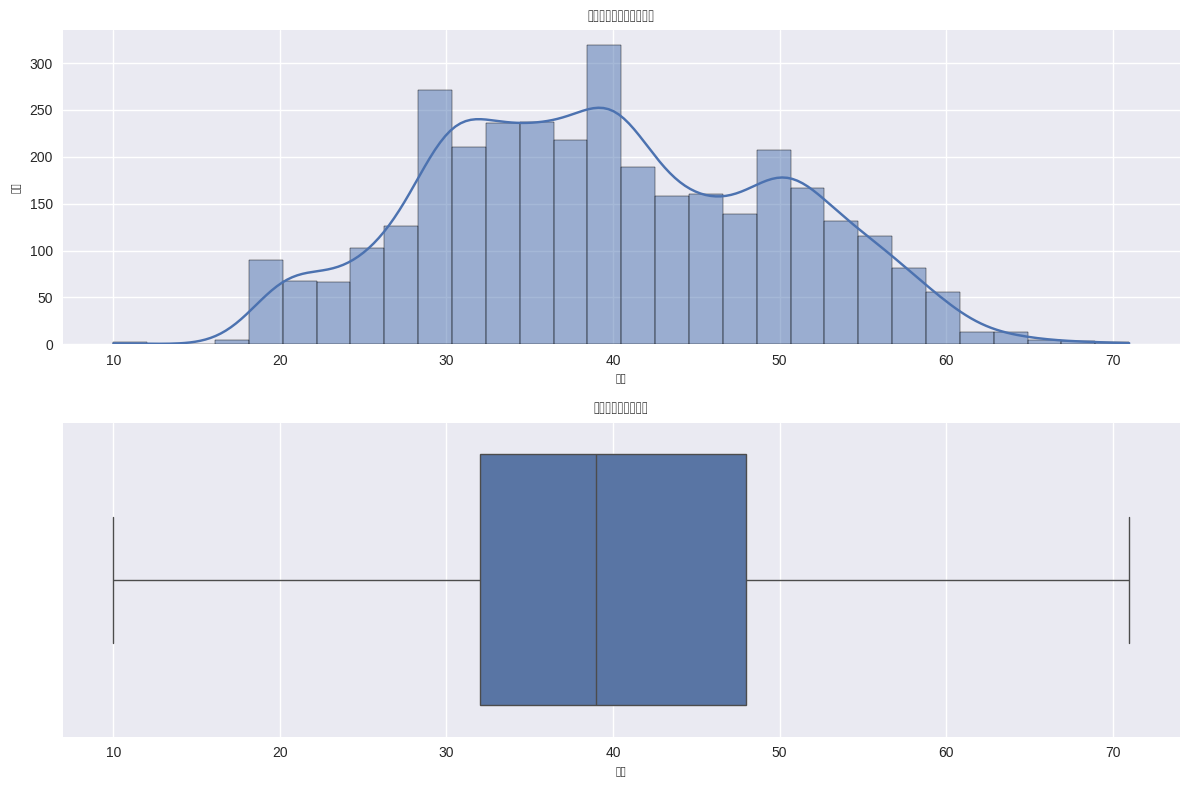

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40802 (\N{CJK UNIFIED IDEOGRAPH-9F62}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/li

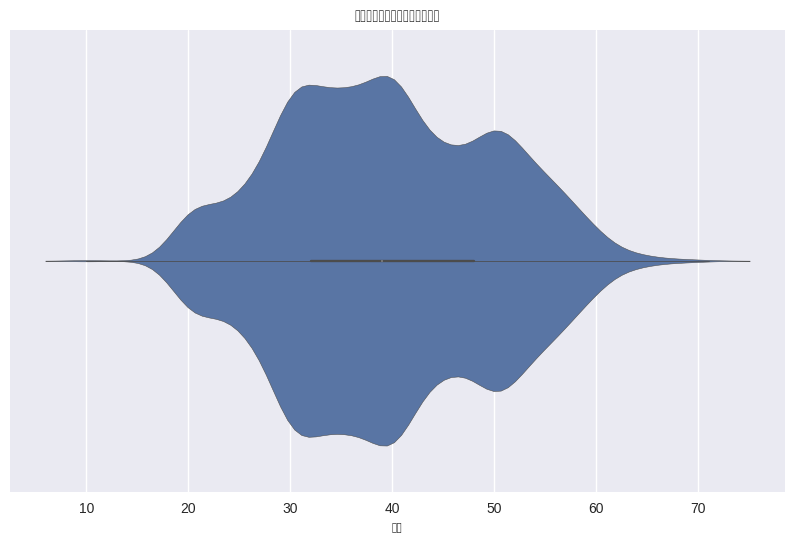

In [10]:
# プロットのスタイル設定
plt.style.use('seaborn')
plt.figure(figsize=(12, 8))

# ヒストグラム
plt.subplot(2, 1, 1)
sns.histplot(data=df, x='Age', kde=True, bins=30)
plt.title('年齢分布のヒストグラム')
plt.xlabel('年齢')
plt.ylabel('頻度')

# 箱ひげ図
plt.subplot(2, 1, 2)
sns.boxplot(x=df['Age'])
plt.title('年齢分布の箱ひげ図')
plt.xlabel('年齢')

plt.tight_layout()
plt.show()

# 追加: バイオリンプロット
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Age'])
plt.title('年齢分布のバイオリンプロット')
plt.xlabel('年齢')
plt.show()

In [11]:
# Age列のユニークな値を確認
print(df['Age'].unique())


[50. 56. nan 47. 48. 19. 49. 33. 31. 51. 46. 53. 20. 25. 63. 44. 30. 34.
 29. 41. 52. 22. 36. 28. 61. 38. 43. 35. 59. 32. 42. 58. 40. 57. 54. 21.
 37. 26. 27. 45. 24. 18. 39. 55. 60. 64. 23. 10. 68. 62. 66. 65. 69. 71.]


# DurationOfPitchの前処理
営業担当者による顧客への商品のセールス時間

In [12]:
def convert_to_seconds(duration):
    if pd.isna(duration):
        return None

    duration = str(duration)  # 数値を文字列に変換
    match = re.match(r'(\d+)\s*(\w+)?', duration)
    if match:
        value, unit = match.groups()
        value = int(value)

        if unit is None or unit == '秒':
            return value
        elif unit == '分':
            return value * 60
        else:
            return None  # 不明な単位の場合
    return None  # マッチしない場合

def process_duration(duration):
    try:
        return convert_to_seconds(duration)
    except:
        return None  # エラーが発生した場合はNoneを返す

# データフレームに適用
df['DurationOfPitch'] = df['DurationOfPitch'].apply(process_duration)

# 結果の確認
print(df['DurationOfPitch'].describe())

# NaN値の確認
print(f"NaN値の数: {df['DurationOfPitch'].isna().sum()}")

count    3368.000000
mean      860.682898
std       417.261793
min       240.000000
25%       540.000000
50%       780.000000
75%       960.000000
max      2160.000000
Name: DurationOfPitch, dtype: float64
NaN値の数: 121


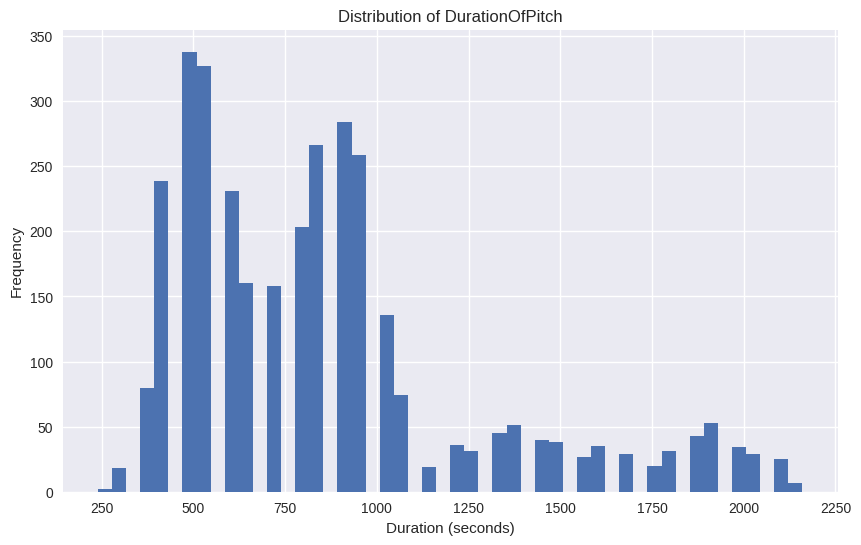

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['DurationOfPitch'].hist(bins=50)
plt.title('Distribution of DurationOfPitch')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# NumberOfTrips列の前処理
予定している旅行の同行者の数

## 性別の前処理

In [14]:
def normalize_gender(gender):
    if pd.isna(gender):
        return None

    # 文字列に変換し、小文字化
    gender = str(gender).lower()

    # 全角文字を半角に変換
    gender = gender.translate(str.maketrans({chr(0xFF01 + i): chr(0x21 + i) for i in range(94)}))

    # スペースと特殊文字を削除
    gender = re.sub(r'[^\w]', '', gender)

    # 'female' に関連する文字列をまず確認（'male'より先に確認する）
    if re.search(r'fe?m[ae]le', gender):
        return 'female'

    # 'male' に関連する文字列をチェック
    elif re.search(r'^m[ae]le$', gender):
        return 'male'

    # それ以外の場合
    else:
        return None

# データフレームに適用
df['Gender'] = df['Gender'].apply(normalize_gender)

# 結果の確認
print(df['Gender'].value_counts(dropna=False))


Gender
male      2064
female    1425
Name: count, dtype: int64


In [15]:
print(df.columns)

Index(['id', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'Designation', 'MonthlyIncome',
       'customer_info', 'ProdTaken'],
      dtype='object')


# ProductPitched　営業担当者のセールスした商品の種類

In [16]:
def normalize_product_pitched(product):
    if pd.isna(product):
        return None

    # 文字列に変換し、小文字化
    product = str(product).lower()

    # 全角文字を半角に変換
    product = product.translate(str.maketrans({chr(0xFF01 + i): chr(0x21 + i) for i in range(94)}))

    # スペースと特殊文字を削除
    product = re.sub(r'[^\w]', '', product)

    # 製品カテゴリーのマッピング
    if re.search(r'basic', product):
        return 'basic'
    elif re.search(r'standard', product):
        return 'standard'
    elif re.search(r'deluxe', product):
        return 'deluxe'
    elif re.search(r'superdeluxe', product):
        return 'super deluxe'
    elif re.search(r'king', product):
        return 'king'
    else:
        return 'other'  # または None

# データフレームに適用
df['ProductPitched'] = df['ProductPitched'].apply(normalize_product_pitched)

# 結果の確認
print(df['ProductPitched'].value_counts(dropna=False))


ProductPitched
deluxe      1323
basic       1098
standard     814
other        131
king         123
Name: count, dtype: int64


In [17]:
print(df['ProductPitched'].value_counts(dropna=False))
print(df['ProductPitched'].unique())

ProductPitched
deluxe      1323
basic       1098
standard     814
other        131
king         123
Name: count, dtype: int64
['basic' 'standard' 'deluxe' 'other' 'king']


In [18]:
print(df.columns)

Index(['id', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'Designation', 'MonthlyIncome',
       'customer_info', 'ProdTaken'],
      dtype='object')


# NumberOfTrips	顧客の年間旅行数

In [19]:
def preprocess_trips(value):
    if pd.isna(value):
        return None

    value = str(value).lower()

    # 数字のみの場合はそのまま返す
    if value.isdigit():
        return int(value)

    # 「年に○回」のパターン
    match = re.search(r'年に(\d+)回', value)
    if match:
        return int(match.group(1))

    # 特殊なケース
    if '半年に1回' in value:
        return 2
    if '四半期に1回' in value or '3ヶ月に1回' in value:
        return 4
    if '月に1回' in value:
        return 12

    # 数字を抽出
    numbers = re.findall(r'\d+', value)
    if numbers:
        return int(numbers[0])

    return None  # パターンにマッチしない場合

# データフレームに適用
df['NumberOfTrips'] = df['NumberOfTrips'].apply(preprocess_trips)

# 結果の確認
print(df['NumberOfTrips'].value_counts().sort_index())
print(df['NumberOfTrips'].describe())

NumberOfTrips
1.0     426
2.0    1147
3.0     820
4.0     163
5.0     515
6.0     130
7.0     256
8.0      10
Name: count, dtype: int64
count    3467.000000
mean        3.189789
std         1.737632
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         8.000000
Name: NumberOfTrips, dtype: float64


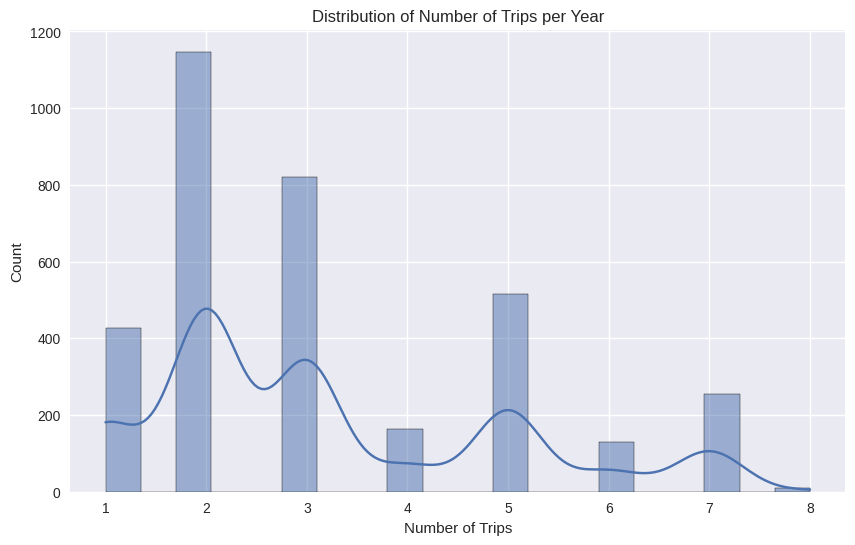

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['NumberOfTrips'].dropna(), kde=True, bins=20)
plt.title('Distribution of Number of Trips per Year')
plt.xlabel('Number of Trips')
plt.ylabel('Count')
plt.show()

# Designation		顧客の役職

In [21]:
def normalize_designation(designation):
    if pd.isna(designation):
        return None

    # 小文字に変換
    designation = str(designation).lower()

    # 全角文字を半角に変換
    designation = designation.translate(str.maketrans({chr(0xFF01 + i): chr(0x21 + i) for i in range(94)}))

    # 特殊文字を削除
    designation = re.sub(r'[^\w\s]', '', designation)

    # スペースを削除
    designation = designation.replace(' ', '')

    # 役職の正規化
    if 'executive' in designation:
        return 'Executive'
    elif 'seniormanager' in designation:
        return 'Senior Manager'
    elif 'manager' in designation:
        return 'Manager'
    elif 'avp' in designation or 'assistantvicepresident' in designation:
        return 'AVP'
    elif 'vp' in designation or 'vicepresident' in designation:
        return 'VP'
    else:
        return 'Other'

# データフレームに適用
df['Designation'] = df['Designation'].apply(normalize_designation)

# 結果の確認
print(df['Designation'].value_counts())

Designation
Executive         1096
Manager           1019
Senior Manager     825
AVP                301
VP                 129
Other              119
Name: count, dtype: int64


# 役職ごとの製品選択の傾向を確認します：


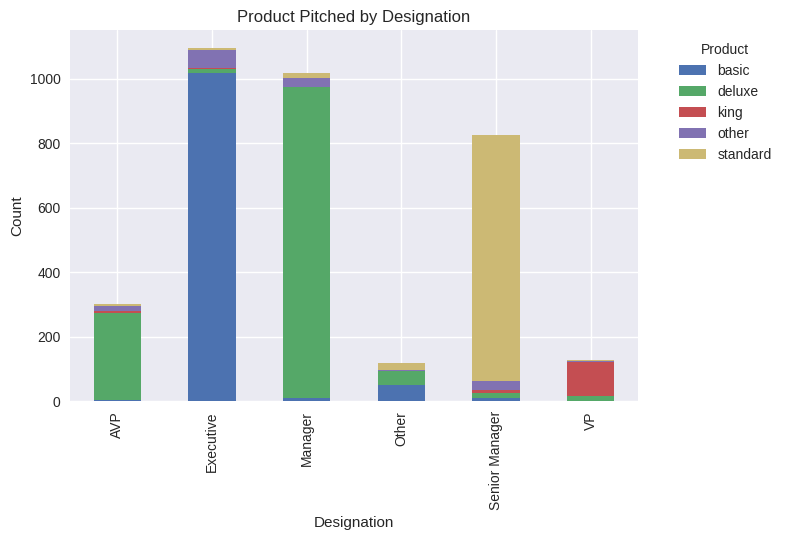

In [22]:
pd.crosstab(df['Designation'], df['ProductPitched']).plot(kind='bar', stacked=True)
plt.title('Product Pitched by Designation')
plt.xlabel('Designation')
plt.ylabel('Count')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# MonthlyIncome列の前処理
顧客の月収

In [23]:
def convert_income(x):
    if pd.isna(x):
        return np.nan

    x = str(x).strip()  # 文字列に変換し、前後の空白を削除

    try:
        if '万円' in x:
            # '万円'が含まれる場合
            value = x.replace('月収', '').replace('万円', '').replace('万', '')
            return int(float(value) * 10000)
        elif '万' in x:
            # '万'が含まれる場合（'円'がない場合）
            value = x.replace('月収', '').replace('万', '')
            return int(float(value) * 10000)
        else:
            # その他の場合
            return int(float(x))
    except ValueError:
        print(f"処理できない値: {x}")
        return np.nan

# 数値データの抽出と整形
train['MonthlyIncome'] = train['MonthlyIncome'].astype(str).str.replace(',', '')

# 収入データの変換
train['MonthlyIncome'] = train['MonthlyIncome'].apply(convert_income)

# 欠損値の確認
print("欠損値の数:", train['MonthlyIncome'].isnull().sum())

# 基本統計量の算出
print(train['MonthlyIncome'].describe())

# 外れ値の確認
Q1 = train['MonthlyIncome'].quantile(0.25)
Q3 = train['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = train[(train['MonthlyIncome'] < lower_bound) | (train['MonthlyIncome'] > upper_bound)]
print("外れ値の数:", len(outliers))

# データ型の変換（NaNを含む場合はfloat型になります）
train['MonthlyIncome'] = train['MonthlyIncome'].astype('float').astype('Int64')

# 前処理後のデータを新しい変数に格納
train_processed = train.copy()

# 結果の確認
print(train_processed['MonthlyIncome'].describe())

処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
処理できない値: nan
欠損値の数: 56
count      3433.000000
mean     355671.369065
std       75173.253245
min      200000.000000
25%      300000.000000
50%      343140.000000
75%      400000.000000
max      600000.000000
Name: MonthlyIncome, dtype: float64
外れ値の数: 56
count           3433.0
mean     

In [24]:
#MonthlyIncome 列のデータを数値に変換する関数を作成
def convert_income(x):
    if pd.isna(x):
        return np.nan
    if isinstance(x, (int, float)):
        return x
    x = str(x).replace(',', '').replace('円', '')
    if '万' in x:
        return float(x.replace('月収', '').replace('万', '')) * 10000
    return float(x)

# MonthlyIncome列を変換
df['MonthlyIncome'] = df['MonthlyIncome'].apply(convert_income)

In [25]:
#変換後、再度グループ化と集計
print(df['MonthlyIncome'].describe())
income_by_designation = df.groupby('Designation')['MonthlyIncome'].agg(['median', 'count'])
print(income_by_designation)

count      3433.000000
mean     355671.369065
std       75173.253245
min      200000.000000
25%      300000.000000
50%      343140.000000
75%      400000.000000
max      600000.000000
Name: MonthlyIncome, dtype: float64
                  median  count
Designation                    
AVP             474060.0    299
Executive       300000.0   1065
Manager         333555.0    999
Other           328200.0    116
Senior Manager  387210.0    825
VP              500325.0    129


In [26]:
#欠損値の補完
def fill_income(row):
    if pd.isna(row['MonthlyIncome']):
        return income_by_designation.loc[row['Designation'], 'median']
    return row['MonthlyIncome']

df['MonthlyIncome'] = df.apply(fill_income, axis=1)

In [27]:
#補完後の統計量を確認
print(df['MonthlyIncome'].describe())
print("欠損値の数:", df['MonthlyIncome'].isnull().sum())

count      3489.000000
mean     355094.190312
std       74826.420426
min      200000.000000
25%      300000.000000
50%      341730.000000
75%      400000.000000
max      600000.000000
Name: MonthlyIncome, dtype: float64
欠損値の数: 0


In [28]:
#外れ値の確認と処理を行う
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['MonthlyIncome'] < lower_bound) | (df['MonthlyIncome'] > upper_bound)]
print("外れ値の数:", len(outliers))

# 外れ値を上限・下限値に置き換える
df['MonthlyIncome'] = df['MonthlyIncome'].clip(lower_bound, upper_bound)

外れ値の数: 56


In [29]:
#データ型を調整します
df['MonthlyIncome'] = df['MonthlyIncome'].astype('float').astype('Int64')
print(df['MonthlyIncome'].dtype)

Int64


# customer_info	未婚 車未所持 子供なし	顧客の情報のメモ
(婚姻状況や車の有無、旅行への子どもの同伴の有無)

In [30]:
print(df['customer_info'].head())
print(df['customer_info'].dtype)

0        未婚 車未所持 子供なし
1       離婚済み,車あり,子供無し
2    結婚済み、自動車未所有,子供なし
3       離婚済み、車所持、子供無し
4           独身／車所持／無子
Name: customer_info, dtype: object
object


In [31]:
#情報を分割して新しい列を作成
def split_customer_info(info):
    info = info.replace('，', ',').replace('、', ',')  # 区切り文字の統一
    parts = [part.strip() for part in info.split(',')]
    marital_status = parts[0] if len(parts) > 0 else None
    car_ownership = next((p for p in parts if '車' in p), None)
    child_status = next((p for p in parts if '子供' in p or '無子' in p), None)
    return pd.Series({'marital_status': marital_status, 'car_ownership': car_ownership, 'child_status': child_status})

df[['marital_status', 'car_ownership', 'child_status']] = df['customer_info'].apply(split_customer_info)

In [32]:
#各列の値を確認
for col in ['marital_status', 'car_ownership', 'child_status']:
    print(f"\n{col}:")
    print(df[col].value_counts(dropna=False))


marital_status:
marital_status
結婚済み              664
離婚済み              431
独身                324
未婚                307
離婚済み 車所持 子供1人      16
                 ... 
未婚 乗用車なし 子供なし       1
離婚済み/車あり/非育児家庭      1
結婚済み/車所持/こども1人      1
未婚　車未所持　子供無し        1
独身／車所持／こども1人        1
Name: count, Length: 999, dtype: int64

car_ownership:
car_ownership
車所持               401
車未所持              382
自動車未所有            227
自動車所有             186
自家用車なし            111
                 ... 
未婚 乗用車なし 子供なし       1
離婚済み/車あり/非育児家庭      1
結婚済み/車所持/こども1人      1
未婚　車未所持　子供無し        1
独身／車所持／こども1人        1
Name: count, Length: 1007, dtype: int64

child_status:
child_status
None                    919
子供1人                    445
子供なし                    261
子供2人                    194
子供無し                    122
                       ... 
未婚 車なし 子供有り 1人            1
離婚済み/自動車未所有/子供有り(1人)      1
離婚済み\n車なし\n子供なし           1
独身／車未所持/子供無し              1
結婚済み/自家用車なし/子供有り(2人)      1
Name: count, Length: 709, dtype: int64


In [33]:
def clean_marital_status(x):
    if pd.isna(x):
        return 'unknown'
    x = str(x).lower()
    if '結婚' in x or '既婚' in x:
        return 'married'
    elif '離婚' in x:
        return 'divorced'
    elif '未婚' in x or '独身' in x:
        return 'single'
    else:
        return 'unknown'

def clean_car_ownership(x):
    if pd.isna(x):
        return 'unknown'
    x = str(x).lower()
    if '所持' in x or 'あり' in x or '所有' in x:
        return 'yes'
    elif '未所持' in x or 'なし' in x or '未所有' in x:
        return 'no'
    else:
        return 'unknown'

def clean_child_status(x):
    if pd.isna(x):
        return 'unknown'
    x = str(x).lower()
    if '無し' in x or '無子' in x or 'なし' in x:
        return 'no_children'
    elif '1人' in x:
        return 'one_child'
    elif '2人' in x:
        return 'two_children'
    elif '子供' in x or 'こども' in x:
        return 'has_children'
    else:
        return 'unknown'

# 各列をクリーニング
df['marital_status'] = df['customer_info'].apply(clean_marital_status)
df['car_ownership'] = df['customer_info'].apply(clean_car_ownership)
df['child_status'] = df['customer_info'].apply(clean_child_status)

# 結果の確認
for col in ['marital_status', 'car_ownership', 'child_status']:
    print(f"\n{col}:")
    print(df[col].value_counts(dropna=False))

# カテゴリ変数に変換
for col in ['marital_status', 'car_ownership', 'child_status']:
    df[col] = df[col].astype('category')

# エンコーディング（必要に応じて）
df['marital_status_encoded'] = df['marital_status'].map({'single': 0, 'married': 1, 'divorced': 2, 'unknown': -1})
df['car_ownership_encoded'] = df['car_ownership'].map({'no': 0, 'yes': 1, 'unknown': -1})
df['child_status_encoded'] = df['child_status'].map({'no_children': 0, 'one_child': 1, 'two_children': 2, 'has_children': 3, 'unknown': -1})

# エンコードされた列の確認
for col in ['marital_status_encoded', 'car_ownership_encoded', 'child_status_encoded']:
    print(f"\n{col}:")
    print(df[col].value_counts(dropna=False))

# 元のcustomer_info列を削除
df = df.drop('customer_info', axis=1)

# 最終的なデータフレームの構造を確認
print(df.info())


marital_status:
marital_status
married     1384
single      1227
divorced     878
Name: count, dtype: int64

car_ownership:
car_ownership
yes        2867
no          535
unknown      87
Name: count, dtype: int64

child_status:
child_status
no_children     1262
one_child       1220
two_children     651
unknown          223
has_children     133
Name: count, dtype: int64

marital_status_encoded:
marital_status_encoded
1    1384
0    1227
2     878
Name: count, dtype: int64

car_ownership_encoded:
car_ownership_encoded
1     2867
0      535
-1      87
Name: count, dtype: int64

child_status_encoded:
child_status_encoded
0     1262
1     1220
2      651
-1     223
3      133
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      3489 non-null   int64   
 1   Age                 

In [34]:
df = pd.get_dummies(df, columns=['marital_status', 'car_ownership', 'child_status'], prefix=['marital', 'car', 'child'])

                                      id       Age  CityTier  DurationOfPitch  \
id                              1.000000  0.042337 -0.007994        -0.013604   
Age                             0.042337  1.000000 -0.077967        -0.025829   
CityTier                       -0.007994 -0.077967  1.000000         0.066197   
DurationOfPitch                -0.013604 -0.025829  0.066197         1.000000   
NumberOfPersonVisiting          0.292702  0.004990 -0.053961        -0.008048   
NumberOfFollowups              -0.008549  0.004906 -0.003678        -0.027120   
PreferredPropertyStar           0.535946  0.112719  0.056423        -0.077045   
NumberOfTrips                   0.006830  0.156918 -0.057098         0.036211   
Passport                       -0.063760  0.040484  0.014711        -0.035055   
PitchSatisfactionScore          0.059996 -0.077706 -0.053897         0.049682   
MonthlyIncome                   0.068434  0.440808 -0.007669        -0.025359   
ProdTaken                   

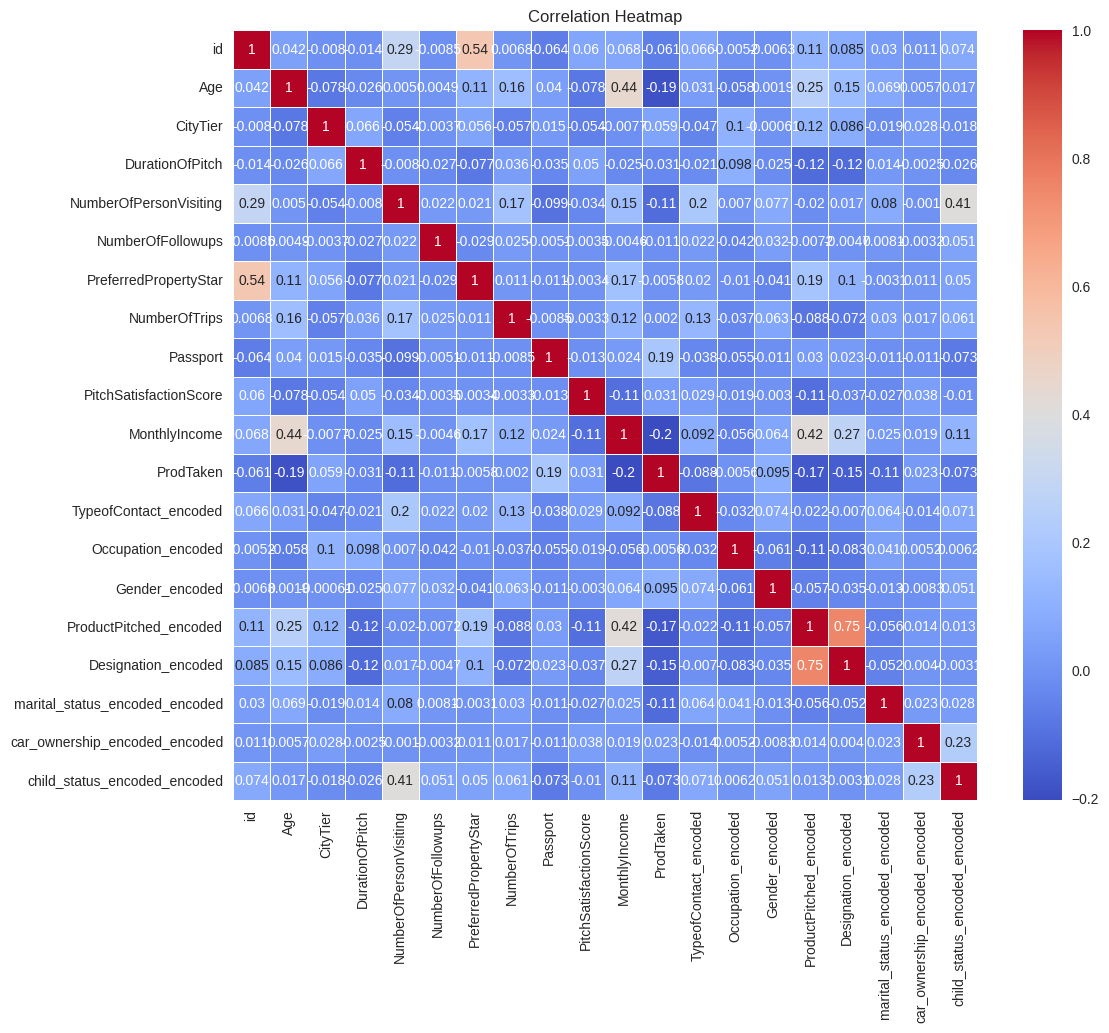

In [35]:
from sklearn.preprocessing import LabelEncoder

# カテゴリカル変数を数値にエンコード
categorical_columns = df.select_dtypes(include=['category', 'object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col].astype(str))

# 数値型の列のみを選択
numeric_columns = df.select_dtypes(include=['int64', 'float64', 'Int64']).columns

# 欠損値の処理（例：数値型の欠損値を中央値で補完）
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].median())

# スケーリング（例：標準化）
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# 相関分析（数値型の列のみ）
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)

# ヒートマップの描画（オプション）
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

強い正の相関:

ProdTakenとPassport (0.195): パスポートを持っている人は製品を購入する傾向が高い。
MonthlyIncomeとAge (0.441): 年齢が高いほど月収が高い傾向がある。
MonthlyIncomeとProductPitched_encoded (0.417): 特定の製品ピッチが高収入の顧客に向けられている可能性がある。
NumberOfPersonVisitingとchild_status_encoded_encoded (0.406): 子供がいる家族は、より多くの人数で訪問する傾向がある。
ProductPitched_encodedとDesignation_encoded (0.751): 特定の役職に特定の製品がピッチされている可能性が高い。


中程度の相関:

idとPreferredPropertyStar (0.536): IDの順序と好みのホテルの星の数に関連性がある可能性がある（ただし、これは偶然の可能性も高い）。
MonthlyIncomeとDesignation_encoded (0.268): 役職が上がるほど月収が高くなる傾向がある。


弱い負の相関:

ProdTakenとMonthlyIncome (-0.203): 興味深いことに、月収が高いほど製品を購入しない傾向がある。
ProdTakenとAge (-0.186): 年齢が高いほど製品を購入しない傾向がある。


その他の注目点:

CityTierは他の変数との相関が全体的に低い。
GenderはProdTakenとわずかな正の相関(0.095)がある。
PitchSatisfactionScoreは他の変数との相関が全体的に低い。



これらの洞察に基づいて、以下の提案ができます：

顧客セグメンテーション: 年齢、収入、役職、子供の有無などを基にセグメントを作成し、それぞれに適したマーケティング戦略を立てる。
製品ピッチの最適化: 役職や収入レベルに応じて、適切な製品をピッチする。
家族向けキャンペーン: 子供がいる家族は複数人で訪問する傾向があるため、家族向けのパッケージや特典を検討する。
若年層向けの戦略: 年齢が低い顧客ほど製品を購入する傾向があるため、若年層向けの魅力的な製品やサービスを開発する。
高収入層の購買意欲向上: 高収入層が製品を購入しない傾向があるため、この層に特化した高付加価値製品やサービスを検討する。
パスポート所持者向けキャンペーン: パスポートを持っている顧客は製品を購入する傾向が高いため、海外旅行に関連した製品やサービスを強化する。

In [36]:
print(df.describe())

                 id           Age      CityTier  DurationOfPitch  \
count  3.489000e+03  3.489000e+03  3.489000e+03     3.489000e+03   
mean   6.516872e-17 -7.535134e-17  6.262307e-17    -4.480350e-17   
std    1.000143e+00  1.000143e+00  1.000143e+00     1.000143e+00   
min   -1.731554e+00 -2.923304e+00 -1.038196e+00    -1.506421e+00   
25%   -8.657772e-01 -7.439010e-01 -1.038196e+00    -7.750123e-01   
50%    0.000000e+00 -5.045466e-02  4.512223e-01    -1.898853e-01   
75%    8.657772e-01  7.420555e-01  4.512223e-01     2.489598e-01   
max    1.731554e+00  3.119586e+00  1.940640e+00     3.174594e+00   

       NumberOfPersonVisiting  NumberOfFollowups  PreferredPropertyStar  \
count            3.489000e+03       3.489000e+03           3.489000e+03   
mean            -1.629218e-17      -3.665741e-17          -2.606749e-16   
std              1.000143e+00       1.000143e+00           1.000143e+00   
min             -1.919689e+00      -1.712074e-01          -7.357225e-01   
25%         

In [37]:
for col in df.select_dtypes(include=['object', 'category']):
    print(f"\n{col}:")
    print(df[col].value_counts(normalize=True))


TypeofContact:
TypeofContact
Self Enquiry       0.629917
Company Invited    0.370083
Name: proportion, dtype: float64

Occupation:
Occupation
Small Business    0.494984
Salaried          0.401548
Large Business    0.103468
Name: proportion, dtype: float64

Gender:
Gender
male      0.591574
female    0.408426
Name: proportion, dtype: float64

ProductPitched:
ProductPitched
deluxe      0.379192
basic       0.314703
standard    0.233305
other       0.037547
king        0.035254
Name: proportion, dtype: float64

Designation:
Designation
Executive         0.314130
Manager           0.292061
Senior Manager    0.236457
AVP               0.086271
VP                0.036973
Other             0.034107
Name: proportion, dtype: float64

marital_status_encoded:
marital_status_encoded
1    0.396675
0    0.351677
2    0.251648
Name: proportion, dtype: float64

car_ownership_encoded:
car_ownership_encoded
1     0.821725
0     0.153339
-1    0.024936
Name: proportion, dtype: float64

child_status_enco

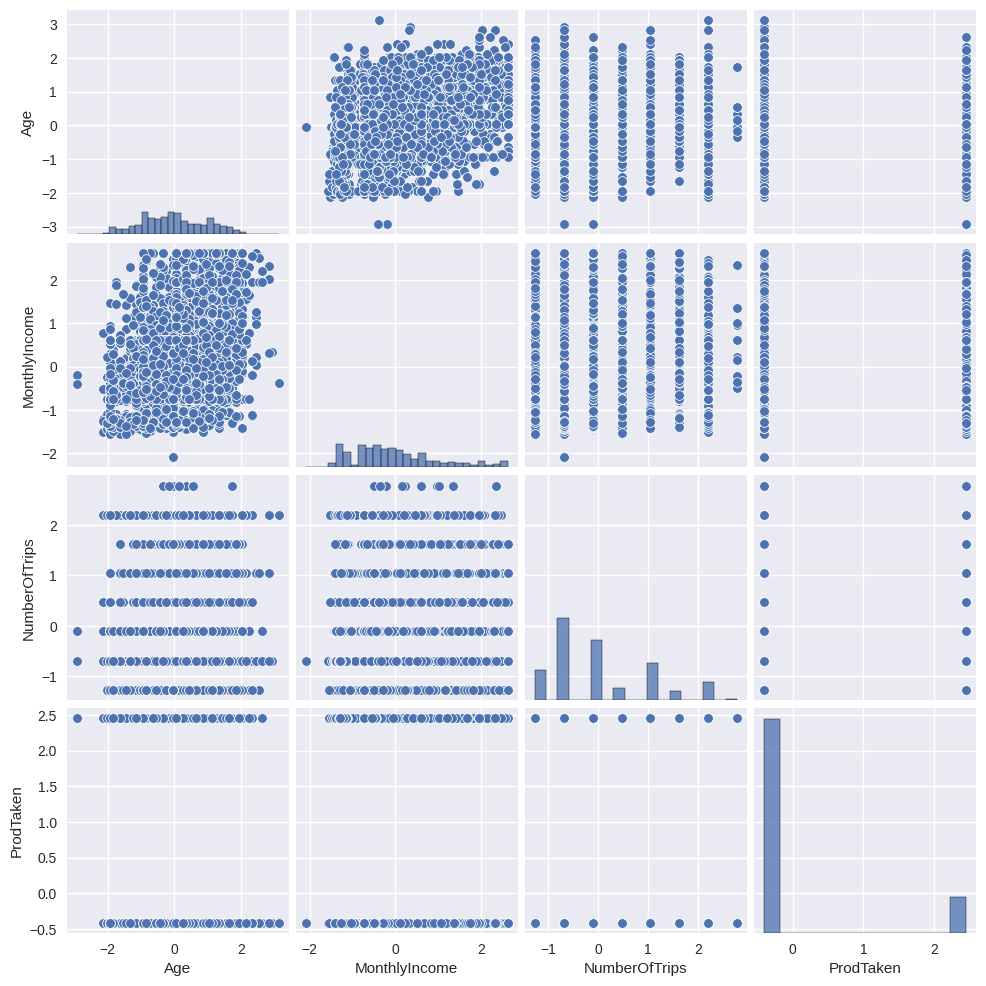

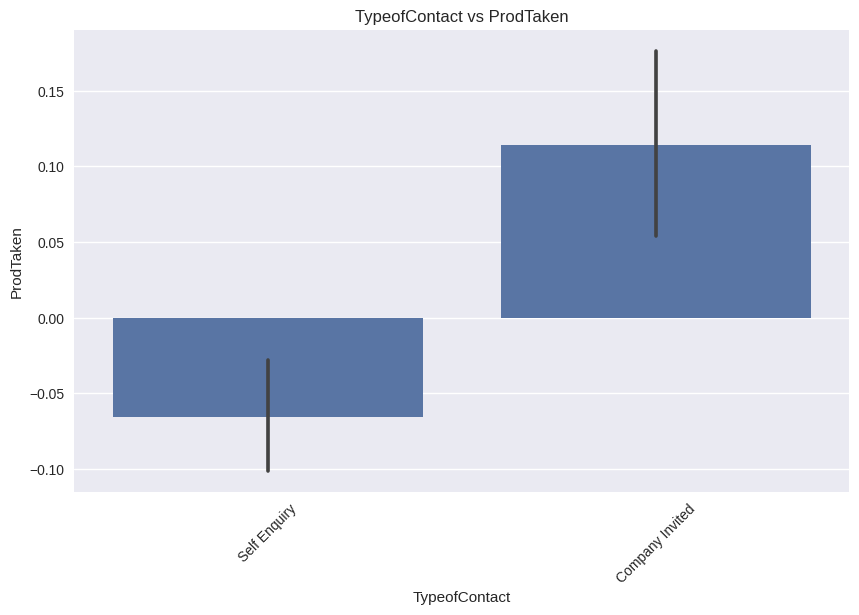

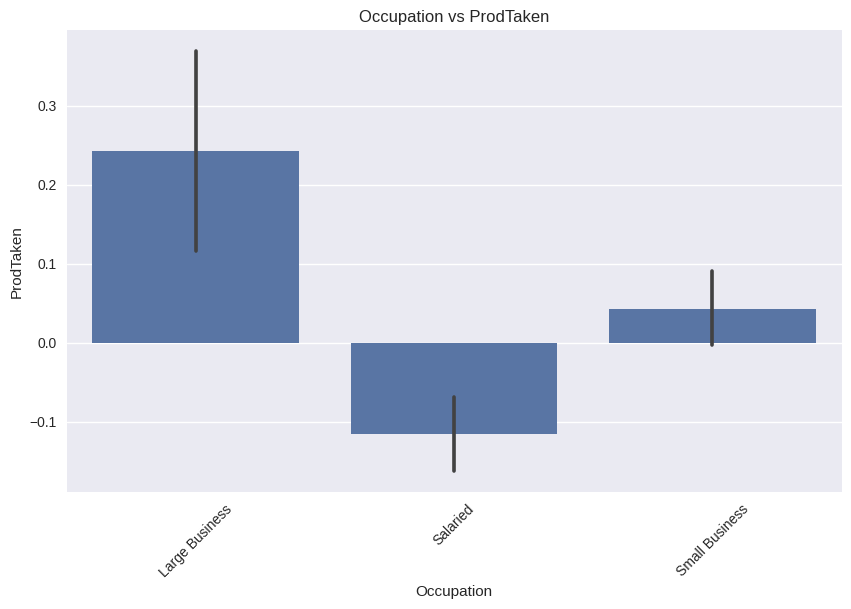

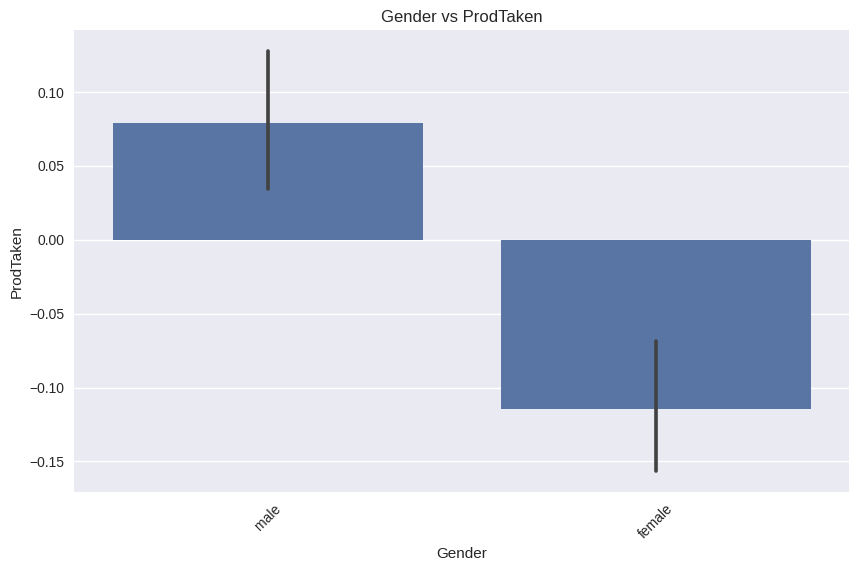

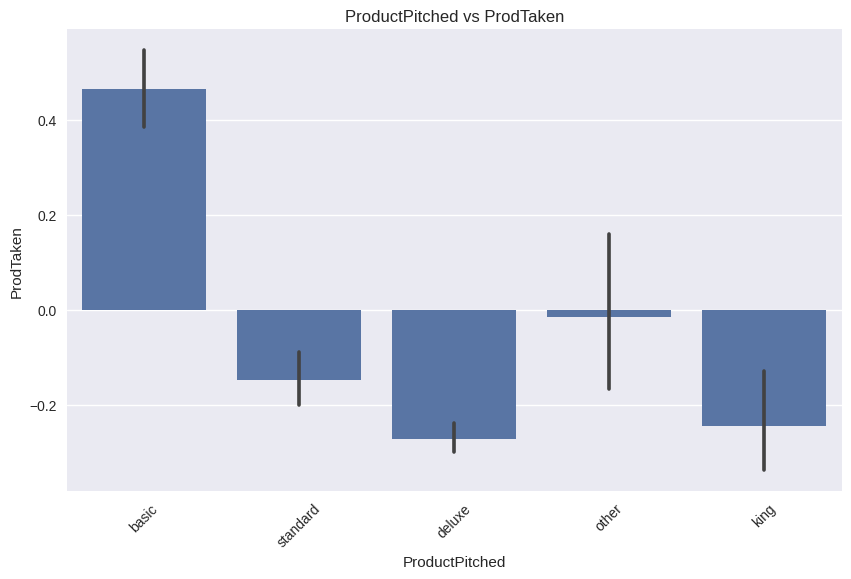

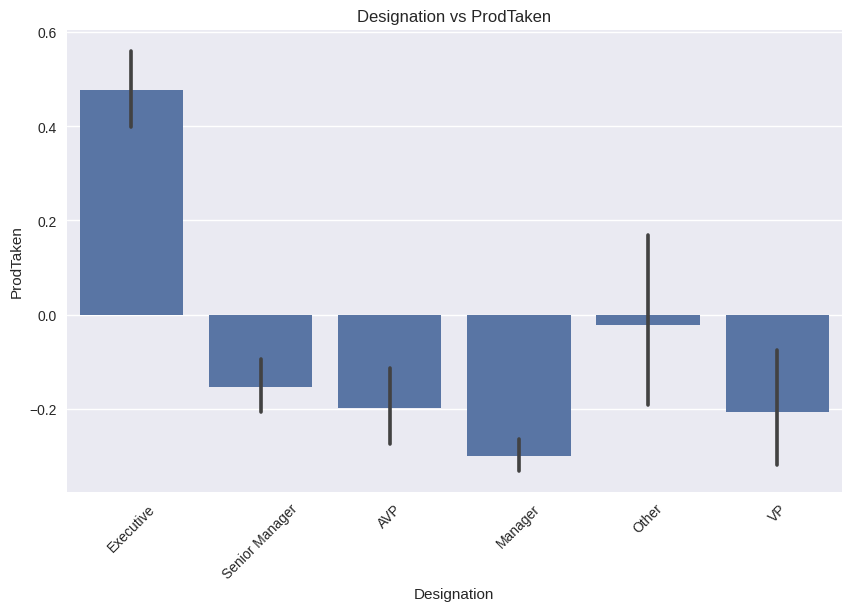

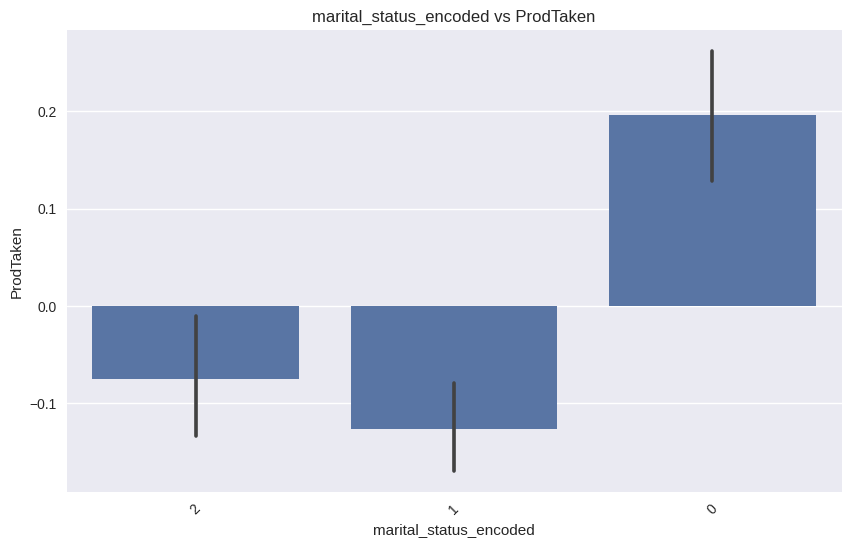

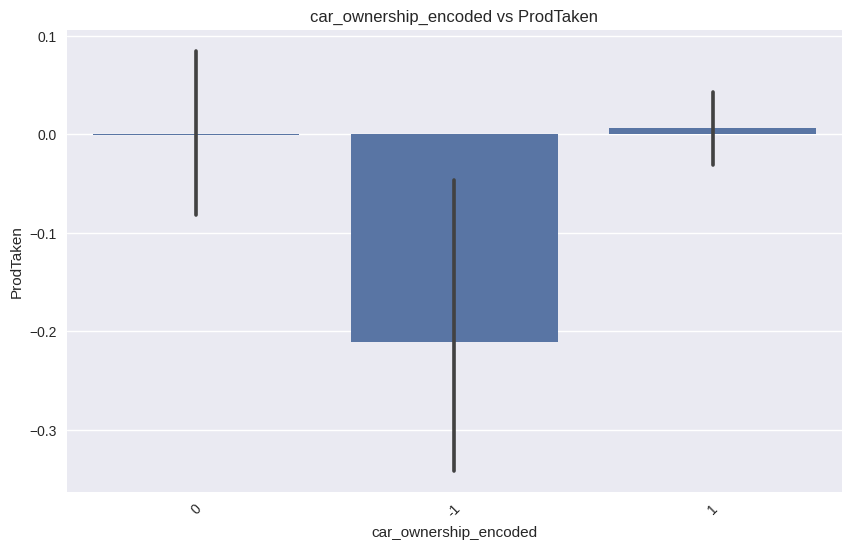

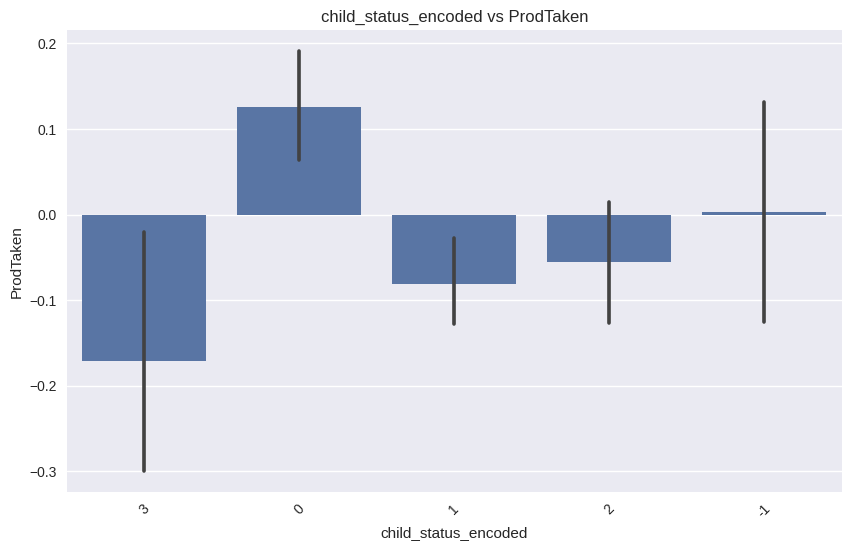

In [38]:
# 数値変数間の散布図
sns.pairplot(df[['Age', 'MonthlyIncome', 'NumberOfTrips', 'ProdTaken']])
plt.show()

# カテゴリカル変数とターゲット変数の関係
for col in df.select_dtypes(include=['object', 'category']):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y='ProdTaken', data=df)
    plt.title(f'{col} vs ProdTaken')
    plt.xticks(rotation=45)
    plt.show()

In [39]:
#カイ二乗検定 (カテゴリカル変数間の関係)
from scipy.stats import chi2_contingency

cat_vars = df.select_dtypes(include=['object', 'category']).columns
for var1 in cat_vars:
    for var2 in cat_vars:
        if var1 != var2:
            contingency_table = pd.crosstab(df[var1], df[var2])
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)
            print(f"{var1} vs {var2}: p-value = {p_value}")

TypeofContact vs Occupation: p-value = 0.16665283278557577
TypeofContact vs Gender: p-value = 2.147091708898757e-06
TypeofContact vs ProductPitched: p-value = 1.6773707754687336e-05
TypeofContact vs Designation: p-value = 0.00021439817030455526
TypeofContact vs marital_status_encoded: p-value = 3.899919914695345e-07
TypeofContact vs car_ownership_encoded: p-value = 0.5001368661797798
TypeofContact vs child_status_encoded: p-value = 1.937628432471544e-09
Occupation vs TypeofContact: p-value = 0.16665283278557586
Occupation vs Gender: p-value = 7.322217689097425e-05
Occupation vs ProductPitched: p-value = 2.587643546458842e-46
Occupation vs Designation: p-value = 2.7718917635496372e-45
Occupation vs marital_status_encoded: p-value = 0.006787427511814461
Occupation vs car_ownership_encoded: p-value = 0.22558756161728968
Occupation vs child_status_encoded: p-value = 0.016601325663800192
Gender vs TypeofContact: p-value = 2.147091708898763e-06
Gender vs Occupation: p-value = 7.3222176890974

In [40]:
#ANOVA (カテゴリカル変数と数値変数の関係)
from scipy import stats

num_vars = df.select_dtypes(include=['int64', 'float64']).columns
cat_vars = df.select_dtypes(include=['object', 'category']).columns

for num_var in num_vars:
    for cat_var in cat_vars:
        groups = [group for _, group in df.groupby(cat_var)[num_var]]
        f_value, p_value = stats.f_oneway(*groups)
        print(f"{num_var} vs {cat_var}: p-value = {p_value}")

id vs TypeofContact: p-value = 0.00011546298691472769
id vs Occupation: p-value = 0.16809902567469126
id vs Gender: p-value = 0.7088544756996711
id vs ProductPitched: p-value = 2.809095381625545e-11
id vs Designation: p-value = 4.671632504122596e-11
id vs marital_status_encoded: p-value = 0.018611908689131634
id vs car_ownership_encoded: p-value = 0.7921722865309997
id vs child_status_encoded: p-value = 7.797033724159824e-13
Age vs TypeofContact: p-value = 0.05600160109482295
Age vs Occupation: p-value = 6.213573026957507e-10
Age vs Gender: p-value = 0.9109955438601567
Age vs ProductPitched: p-value = 4.064307805706127e-113
Age vs Designation: p-value = 1.327050067752584e-165
Age vs marital_status_encoded: p-value = 1.2719866170264285e-07
Age vs car_ownership_encoded: p-value = 0.06844412682197477
Age vs child_status_encoded: p-value = 0.6139329439981395
CityTier vs TypeofContact: p-value = 0.006470752291851206
CityTier vs Occupation: p-value = 7.84949831193344e-10
CityTier vs Gender: 

<ipython-input-40-e40d98baea71>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group for _, group in df.groupby(cat_var)[num_var]]
<ipython-input-40-e40d98baea71>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group for _, group in df.groupby(cat_var)[num_var]]
<ipython-input-40-e40d98baea71>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group for _, group in df.groupby(cat_var)[num_v

PitchSatisfactionScore vs Occupation: p-value = 0.3150825131769468
PitchSatisfactionScore vs Gender: p-value = 0.8605292317906735
PitchSatisfactionScore vs ProductPitched: p-value = 1.1368604927039438e-14
PitchSatisfactionScore vs Designation: p-value = 2.3270320489026632e-15
PitchSatisfactionScore vs marital_status_encoded: p-value = 8.550512171665185e-14
PitchSatisfactionScore vs car_ownership_encoded: p-value = 0.043416279056887094
PitchSatisfactionScore vs child_status_encoded: p-value = 0.32985305831952577
MonthlyIncome vs TypeofContact: p-value = 1.140191033228519e-08
MonthlyIncome vs Occupation: p-value = 2.5583622425495e-16
MonthlyIncome vs Gender: p-value = 0.00017204203508055995
MonthlyIncome vs ProductPitched: p-value = 7.4663248535e-313
MonthlyIncome vs Designation: p-value = 0.0
MonthlyIncome vs marital_status_encoded: p-value = 4.334258939859346e-05
MonthlyIncome vs car_ownership_encoded: p-value = 0.00728654200855999
MonthlyIncome vs child_status_encoded: p-value = 6.427

<ipython-input-40-e40d98baea71>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group for _, group in df.groupby(cat_var)[num_var]]
<ipython-input-40-e40d98baea71>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group for _, group in df.groupby(cat_var)[num_var]]
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-40-e40d98baea71>:9: FutureWarning: The default of observed=False is deprecated and will be c

In [41]:
print(df['ProdTaken'].value_counts())
print(df['ProdTaken'].dtype)

ProdTaken
-0.407565    2992
 2.453593     497
Name: count, dtype: int64
float64


In [42]:
df['ProdTaken'] = df['ProdTaken'].round().astype(int)

In [43]:
threshold = 0.5  # 適切なしきい値を設定
df['ProdTaken_binary'] = (df['ProdTaken'] > threshold).astype(int)

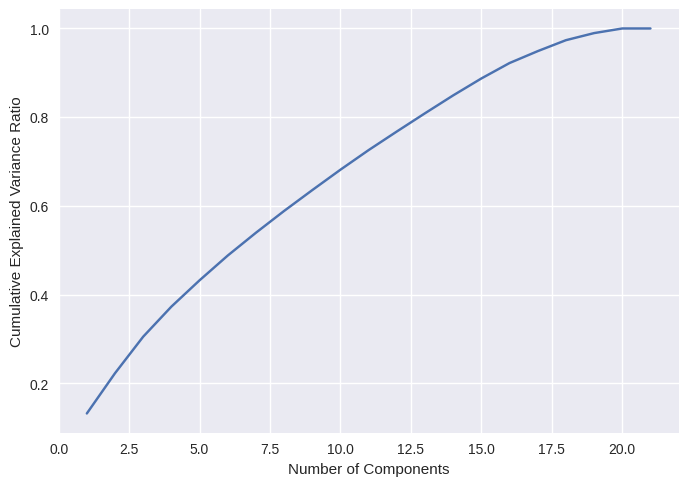

In [44]:
#主成分分析 (PCA)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 数値変数のみを選択
num_features = df.select_dtypes(include=['int64', 'float64']).columns
X = df[num_features]

# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCAの実行
pca = PCA()
pca.fit(X_scaled)

# 累積寄与率の表示
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

# 学習と検証

In [45]:
print(df['ProdTaken'].value_counts(normalize=True))
print(df['ProdTaken'].unique())

ProdTaken
0    0.857552
2    0.142448
Name: proportion, dtype: float64
[2 0]


In [46]:
# 2 を 1 に変更
df['ProdTaken'] = df['ProdTaken'].replace(2, 1)

print("修正後:")
print(df['ProdTaken'].value_counts(normalize=True))
print(df['ProdTaken'].unique())

修正後:
ProdTaken
0    0.857552
1    0.142448
Name: proportion, dtype: float64
[1 0]


# 提出

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# 特徴量エンジニアリング
def create_features(df):
    # 年齢層カテゴリ
    df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 45, 60, 100], labels=['Young', 'MiddleAge', 'Senior', 'Elderly'])

    # 収入レベル
    df['IncomeLevel'] = pd.qcut(df['MonthlyIncome'], q=4, labels=['Low', 'Medium', 'High', 'VeryHigh'])

    # ピッチの効果性
    df['PitchEffectiveness'] = df['PitchSatisfactionScore'] / df['DurationOfPitch']

    # 旅行頻度
    df['TravelFrequency'] = pd.cut(df['NumberOfTrips'], bins=[-1, 0, 2, 5, 100], labels=['None', 'Low', 'Medium', 'High'])

    return df

df = create_features(df)

# 特徴量とターゲット変数の分離
X = df.drop(['ProdTaken', 'ProdTaken_binary'], axis=1)  # 'ProdTaken_binary' も除外
y = df['ProdTaken']

# カテゴリカル変数の処理（ダミー変数化）
X = pd.get_dummies(X, drop_first=True)

# トレーニングセットとテストセットの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 特徴量のスケーリング
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# ランダムフォレストモデル
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"AUC: {roc_auc_score(y_test, y_pred_proba)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 特徴量の重要度
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 Important Features:")
print(feature_importance.head(10))

# XGBoostモデル
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("\nXGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"AUC: {roc_auc_score(y_test, y_pred_proba_xgb)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

Random Forest Results:
Accuracy: 0.8810888252148997
AUC: 0.8322709566449132

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       599
           1       0.71      0.27      0.39        99

    accuracy                           0.88       698
   macro avg       0.80      0.63      0.66       698
weighted avg       0.87      0.88      0.86       698


Top 10 Important Features:
                   feature  importance
10           MonthlyIncome    0.094489
1                      Age    0.083584
0                       id    0.080630
30      PitchEffectiveness    0.062476
3          DurationOfPitch    0.054478
7            NumberOfTrips    0.038270
39   Designation_Executive    0.034215
25  ProductPitched_encoded    0.031951
8                 Passport    0.031225
9   PitchSatisfactionScore    0.030989

XGBoost Results:
Accuracy: 0.8710601719197708
AUC: 0.7892109745198227

Classification Report:
              precisi

In [48]:
def create_features(df):
    # 数値型への変換を確実に行う
    numeric_columns = ['Age', 'MonthlyIncome', 'DurationOfPitch', 'NumberOfTrips', 'PitchSatisfactionScore']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # 年齢層カテゴリ
    df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 45, 60, 100], labels=['Young', 'MiddleAge', 'Senior', 'Elderly'])

    # 収入レベル
    df['IncomeLevel'] = pd.qcut(df['MonthlyIncome'], q=4, labels=['Low', 'Medium', 'High', 'VeryHigh'])

    # ピッチの効果性
    df['PitchEffectiveness'] = df['PitchSatisfactionScore'] / df['DurationOfPitch']

    # 旅行頻度
    df['TravelFrequency'] = pd.cut(df['NumberOfTrips'], bins=[-1, 0, 2, 5, 100], labels=['None', 'Low', 'Medium', 'High'])

    return df

# テストデータの読み込み
test_df = pd.read_csv("/content/drive/MyDrive/signate/test.csv")  # パスは適宜変更してください

# データ型の確認
print(test_df.dtypes)

# 特徴量エンジニアリングの適用
test_df = create_features(test_df)

id                          int64
Age                        object
TypeofContact              object
CityTier                    int64
DurationOfPitch            object
Occupation                 object
Gender                     object
NumberOfPersonVisiting    float64
NumberOfFollowups         float64
ProductPitched             object
PreferredPropertyStar     float64
NumberOfTrips              object
Passport                    int64
PitchSatisfactionScore      int64
Designation                object
MonthlyIncome              object
customer_info              object
dtype: object
